<a href="https://colab.research.google.com/github/nirmalaJ21/-CircleChallenge/blob/main/NirmCopy_of_Weather_Changes_Over_Time_(Consuming_APIs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Changes Over Time (Consuming APIs)

## Task
Utilize the following two APIs to evaluate the changes in temperature for your birthday and city you were born in:
* [geocode.xyz](geocode.xyz)
* [open-meteo.com](open-meteo.com)


In [ ]:
from datetime import date, datetime, timedelta

import requests
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from pprint import pprint
%matplotlib inline

sns.set_palette('muted')
sns.set_style('white')

## Question 1: Geocoding A Location
Write a function that utilizes the [geocode.xyz](geocode.xyz) API to take in a city and country and return the latitude and longitude of that location

```
def geocode_location(city, country):
    # your code
    return latitude, longitude
```

For example:
```
geocode_location("london", "united kingdom")
```
should return
```
(-0.11534, 51.49742)
```

In [ ]:
import requests
import pandas as pd

def geocode_location(city, country):
    url = "https://geocode.xyz"
    params = {'locate': f"{city}, {country}", 'json': 1}

    response = requests.get(url, params=params)
    print(response)
    if response.status_code == 200:
        data = response.json() #Dictionary key value pair
        # df = pd.DataFrame(data('latt'))
        # print(df)
        return data['latt'],data['longt']
    else:
        print("Error:", response.status_code)
        return None

obj1 =geocode_location('London', 'United Kingdom')
print(obj1)


<Response [200]>
('51.51419', '-0.11533')


## Question 2: Determining Weather Using Date and Location
Write a function that utilizes the [open-meteo.com](https://open-meteo.com/) API to take in a date and location and return the 15-day average high and low for the following measurements from the years 1960 to 2022:
* `precipitation_sum` (mm): Sum of daily precipitation (including rain, showers and snowfall)
* `temperature_2m_max` (°F): Maximum daily air temperature at 2 meters above ground
* `temperature_2m_min` (°F): Minimum daily air temperature at 2 meters above ground
* `apparent_temperature_max` (°F): Maximum daily apparent temperature
* `apparent_temperature_min` (°F): Min daily apparent temperature

The function should return the above measurements in a dictionary object with the keys being `"precipitation_sum"`, `"temperature_2m_max"`, etc. and the values being the 15-day average of the measurements. The 15-day average should be the 7 days preceeding the input date, the input date, and the 7 days following the input date. This will give the results more statistical validity by increasing the number of samples for each measurement.

The `get_historical_weather_measurements()` function will include a few different sub-tasks:

### Create API Request in Postman/Insomnia
Use the following [API Documentation](https://open-meteo.com/en/docs/historical-weather-api#api-documentation) page to create an API request that responds with a JSON object of the measurements listed above. Make sure the response object meets the following:
* Temperatue measurements are in Fahrenheit
* Precipitation measurements are in inches
* Measurements are daily aggregations
* 15 day range of weather
* JSON format


Before writing any code, use Postman/Insomnia to create the API request and take a screenshot of the request/response.

### Create API Request Function
Convert the request above into a function. The function should take in `latitude`, `longitude`, and `date` as its arguments and return the API response, if successful.

```
def get_api_response(latitude, longitude, date):
    # your code

```

Use the helper function below for creating a 15-day date range

In [ ]:
# helper function for 15-day date range
def get_date_range(birthday):
    return {'start_date': birthday - timedelta(days=7),
            'end_date': birthday + timedelta(days=7)
           }

In [ ]:
from pprint import pprint

def get_api_response(latitude, longitude, birthday):
    # url = "https://archive-api.open-meteo.com/v1/archive"
    url='https://archive-api.open-meteo.com/v1/archive?'
    get_date = get_date_range(birthday)
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "start_date": get_date['start_date'],
        "end_date": get_date['end_date'],
        "daily": "temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum",
        "timezone": "America/New_York",
        "temperature_unit": temperature_2m_unt,
        "precipitation_unit": precipitation_sum_unt,
        "aggregate": "day",
        "format": "json"
    }

    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        return None
latitude = 52.5
longitude = 13.400009
birthday = date(2022,9,5)
precipitation_sum_unt = "inch"
temperature_2m_unt = "fahrenheit"
response = get_api_response(latitude, longitude, birthday)
if response is not None:
    pprint(response)
else:
    print("API request failed")



{'daily': {'apparent_temperature_max': [68.8,
                                        69.4,
                                        66.5,
                                        64.4,
                                        65.0,
                                        64.3,
                                        69.8,
                                        70.6,
                                        65.9,
                                        73.3,
                                        66.9,
                                        71.8,
                                        69.1,
                                        64.9,
                                        66.6],
           'apparent_temperature_min': [54.0,
                                        56.2,
                                        54.3,
                                        51.0,
                                        49.7,
                                        53.7,
                                 

### Iterating Over Each Year
Write a function that iterates through each year between 1960 and 2022 and returns the corresponding JSON response objects containing weather data for each year in a python list.

```
def get_all_response_objects(start_year, end_year):
    # your code
```


In [ ]:
# write your solution here
def get_all_response_objects(start_year, end_year,birthday):

   weather_data =[]
   latitude = 52.5
   longitude = 13.400009
   for year in range(start_year,end_year + 1):
           get_date = date(year,birthday.month,birthday.day)
           response = get_api_response(latitude,longitude,get_date)
           weather_data.append(response)
   return weather_data

#Caling function Object
start_year = 1960
end_year = 2022

response = get_all_response_objects(start_year, end_year,birthday)

pprint(response)


Streaming output truncated to the last 5000 lines.
                                   77.3,
                                   67.7,
                                   72.3,
                                   68.1,
                                   66.2,
                                   74.0,
                                   77.4,
                                   66.6,
                                   66.1,
                                   68.7,
                                   62.7,
                                   66.0,
                                   69.7],
            'temperature_2m_min': [52.9,
                                   59.8,
                                   59.5,
                                   58.8,
                                   57.5,
                                   55.0,
                                   54.6,
                                   57.5,
                                   55.1,
                                   54.3,
     

### Parse JSON Responses & Aggregate Data
Write a function that takes the list of JSON response objects from the previous function in as a parameter and returns a pandas DataFrame containing the original input date, the measurements, and the average across the 15 days.
```
def parse_json_response(responses):
    # your code
```


For getting reponse in data frame

In [1]:
# from requests.api import get
# # write your solution here
# def parse_json_response(responses):
#     # pass # remove this line once you start adding code to your function
#     df = pd.DataFrame(responses)
#     # print(df)
#     print(df.to_string(index=False))
#     return(df)

# get_date = date(birthday.year,birthday.month,birthday.day)
# # print(birthday)

# responses = get_all_response_objects(1960,2022,get_date)
# parse_response = parse_json_response(responses)
# # pprint(parse_response)

# write your solution here
def parse_json_response(responses):
    df = pd.DataFrame(responses)
    df = df.join(pd.json_normalize(df['daily']))\
           .drop(columns=['daily'])

    # Get average of measurements
    measures = ['temperature_2m_max', 'temperature_2m_min',
                'apparent_temperature_max', 'apparent_temperature_min',
                'precipitation_sum']

    for col in measures:
        df[f"{col}_mean"] = df[col].apply(np.mean)

    # add year column
    df['year'] = df['time'].apply(lambda l: l[0][:4])

    return df[['year'] + [measure + '_mean' for measure in measures]]

For getting the mean values of daily weather data in df

In [ ]:
import pandas as pd
import numpy as np

def parse_json_response(responses):
    data = []
    for response in responses:
        daily_data = response['daily']
        avg_data = {}
        for key, values in daily_data.items():
            numeric_values = [value for value in values if isinstance(value, (int, float))]
            if numeric_values:
                avg_data[key] = sum(numeric_values) / len(numeric_values)
            else:
                avg_data[key] = np.nan
        avg_data['original_data'] = daily_data  # Add original data to the dictionary
        data.append(avg_data)
    df = pd.DataFrame(data)
    return df


get_date = date(birthday.year,birthday.month,birthday.day)
# print(birthday)

responses = get_all_response_objects(1960,2022,get_date)
parse_response = parse_json_response(responses)
pprint(parse_response)


    time  temperature_2m_max  temperature_2m_min  apparent_temperature_max  \
0    NaN           65.086667           50.073333                 61.040000   
1    NaN           71.346667           55.486667                 71.060000   
2    NaN           66.606667           51.753333                 62.766667   
3    NaN           66.540000           50.320000                 64.906667   
4    NaN           68.540000           53.993333                 65.786667   
..   ...                 ...                 ...                       ...   
58   NaN           75.106667           56.893333                 72.313333   
59   NaN           74.420000           56.966667                 70.920000   
60   NaN           69.666667           54.073333                 67.180000   
61   NaN           70.573333           55.100000                 70.393333   
62   NaN           69.833333           55.786667                 67.820000   

    apparent_temperature_min  precipitation_sum  \
0           

Combining dataframe with mean dataframe values

In [ ]:
from requests.api import get
# write your solution here
def parse_json_response(responses):
      data = []
      for response in responses:
        daily_data = response['daily']
        avg_data = {}
        for key, values in daily_data.items():
            numeric_values = [value for value in values if isinstance(value, (int, float))]
            if numeric_values:
                avg_data[key] = sum(numeric_values) / len(numeric_values)
            else:
                avg_data[key] = np.nan
        # avg_data['original_data'] = daily_data  # Add original data to the dictionary
        data.append(avg_data)

    # pass # remove this line once you start adding code to your function
      df = pd.DataFrame(responses)
      df['meandata'] = data
    # print(df)
      # print(df.to_string(index=False)). For printing whole df in one line
      return(df)

get_date = date(birthday.year,birthday.month,birthday.day)
# print(birthday)

responses = get_all_response_objects(1960,2022,get_date)
parse_response = parse_json_response(responses)
pprint(parse_response)

    latitude  longitude  generationtime_ms  utc_offset_seconds  \
0       52.5  13.400009           0.559926              -14400   
1       52.5  13.400009           0.525951              -14400   
2       52.5  13.400009           0.531077              -14400   
3       52.5  13.400009           0.532031              -14400   
4       52.5  13.400009           0.586987              -14400   
..       ...        ...                ...                 ...   
58      52.5  13.400009           0.576019              -14400   
59      52.5  13.400009           0.528097              -14400   
60      52.5  13.400009           0.519037              -14400   
61      52.5  13.400009           0.483036              -14400   
62      52.5  13.400009           0.576019              -14400   

            timezone timezone_abbreviation  elevation  \
0   America/New_York                   EDT       43.0   
1   America/New_York                   EDT       43.0   
2   America/New_York                

### Combining the Functions
Write a function that combines all the above functions into one, where the user inputs their birthday and location and the function returns the pandas DataFrame containing the summary of measurements.

```
def get_data():
    birthday = get_user_birthday()
    location = get_user_city_of_birth()
    # your code here
```

The helper functions below can be used for birthday and location input information:

In [ ]:
# helper functions
def get_user_birthday():
    birthday = input('Enter your birthday (MM/DD/YYYY): ')
    return datetime.strptime(birthday, "%m/%d/%Y")

def get_user_city_of_birth():
    city = input('Enter the city you were born in: ')
    country = input('Enter the country you were born in: ')
    return city , country

In [ ]:
# write your solution here
def get_data():
    get_bdate = get_user_birthday()
    bdate = get_date_range(get_bdate)
    city,con  = get_user_city_of_birth()
    lat,longt = geocode_location(city,con)
    ap_reps = get_api_response(lat,longt,get_bdate)
    df1 =get_all_response_objects(1960,2022,get_bdate)
    dfobj = parse_json_response(df1)
    return dfobj
    # print(dfobj)
    # pass # remove this line once you start adding code to your function

Run your function and set it equal to `df`:

In [ ]:
df = get_data()

df.head()

Enter your birthday (MM/DD/YYYY): 09/05/1982
Enter the city you were born in: London
Enter the country you were born in: United Kingdom
<Response [200]>


,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,daily_units,daily,meandata
0,52.5,13.400009,0.607014,-14400,America/New_York,EDT,43.0,"{'time': 'iso8601', 'temperature_2m_max': '°F'...","{'time': ['1960-08-29', '1960-08-30', '1960-08...","{'time': nan, 'temperature_2m_max': 65.0866666..."
1,52.5,13.400009,0.529051,-14400,America/New_York,EDT,43.0,"{'time': 'iso8601', 'temperature_2m_max': '°F'...","{'time': ['1961-08-29', '1961-08-30', '1961-08...","{'time': nan, 'temperature_2m_max': 71.3466666..."
2,52.5,13.400009,0.514984,-14400,America/New_York,EDT,43.0,"{'time': 'iso8601', 'temperature_2m_max': '°F'...","{'time': ['1962-08-29', '1962-08-30', '1962-08...","{'time': nan, 'temperature_2m_max': 66.6066666..."
3,52.5,13.400009,0.694990,-14400,America/New_York,EDT,43.0,"{'time': 'iso8601', 'temperature_2m_max': '°F'...","{'time': ['1963-08-29', '1963-08-30', '1963-08...","{'time': nan, 'temperature_2m_max': 66.54, 'te..."
4,52.5,13.400009,0.559926,-14400,America/New_York,EDT,43.0,"{'time': 'iso8601', 'temperature_2m_max': '°F'...","{'time': ['1964-08-29', '1964-08-30', '1964-08...","{'time': nan, 'temperature_2m_max': 68.5399999..."


## Question 3: Visualizing The Data
Plot the DataFrame using `matplotlib`/`seaborn` and write a short summary of your results.

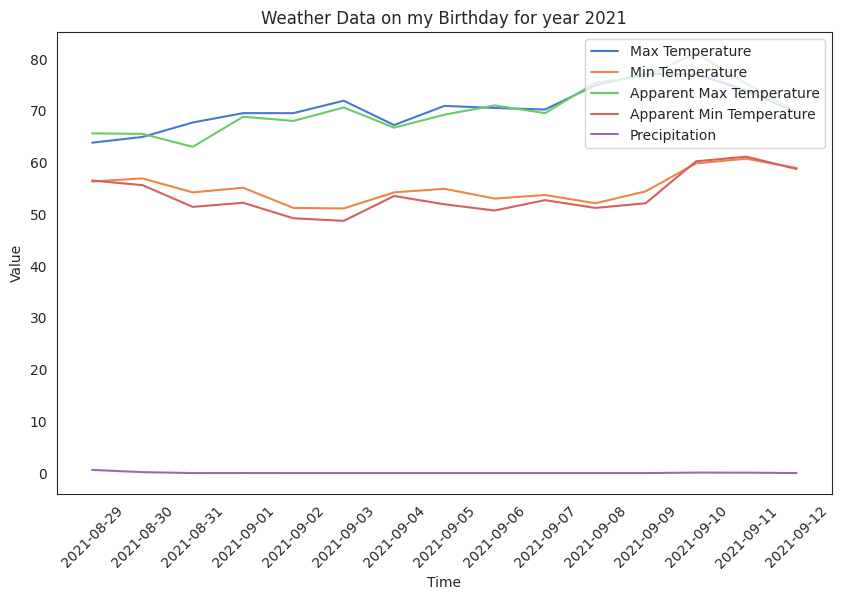

In [ ]:
import matplotlib.pyplot as plt

# Extract data from 'Daily' column
data = df['daily'][61]

# Extract specific values from the data dictionary
time = data['time']
temperature_max = data['temperature_2m_max']
temperature_min = data['temperature_2m_min']
apparent_temperature_max = data['apparent_temperature_max']
apparent_temperature_min = data['apparent_temperature_min']
precipitation_sum = data['precipitation_sum']

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(time, temperature_max, label='Max Temperature')
plt.plot(time, temperature_min, label='Min Temperature')
plt.plot(time, apparent_temperature_max, label='Apparent Max Temperature')
plt.plot(time, apparent_temperature_min, label='Apparent Min Temperature')
plt.plot(time, precipitation_sum, label='Precipitation')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Weather Data on my Birthday for year 2021')
plt.legend(loc ='upper right')
plt.xticks(rotation=45)
plt.show()


### Results Summary:

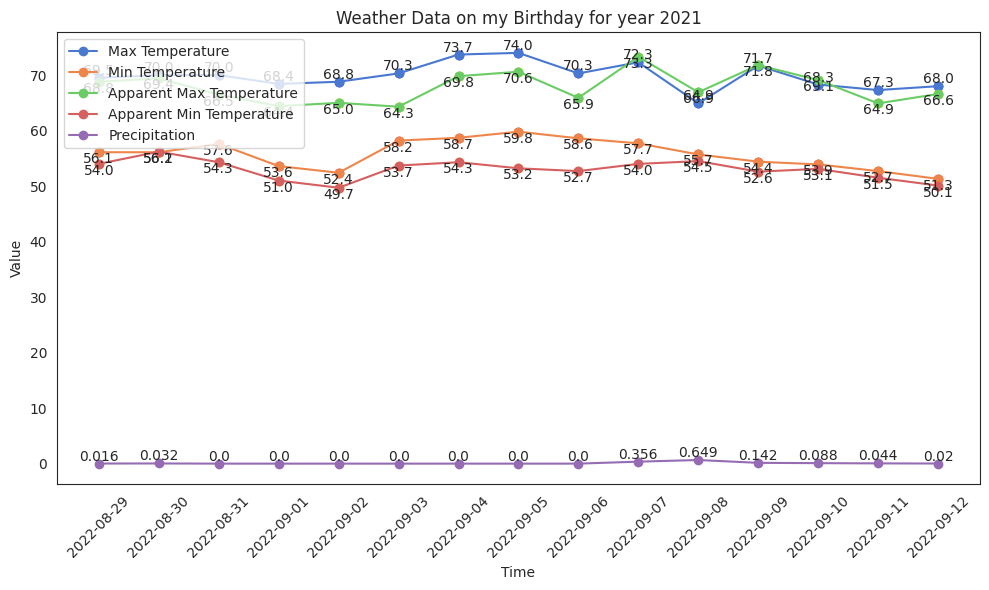

In [ ]:
import matplotlib.pyplot as plt

# Extract data from 'Daily' column
data = df['daily'][62]

# Extract specific values from the data dictionary
time = data['time']
temperature_max = data['temperature_2m_max']
temperature_min = data['temperature_2m_min']
apparent_temperature_max = data['apparent_temperature_max']
apparent_temperature_min = data['apparent_temperature_min']
precipitation_sum = data['precipitation_sum']

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(time, temperature_max, 'o-', label='Max Temperature')
plt.plot(time, temperature_min, 'o-', label='Min Temperature')
plt.plot(time, apparent_temperature_max, 'o-', label='Apparent Max Temperature')
plt.plot(time, apparent_temperature_min, 'o-', label='Apparent Min Temperature')
plt.plot(time, precipitation_sum, 'o-', label='Precipitation')

# Add data labels to the marker points
for i, txt in enumerate(temperature_max):
    plt.scatter(time[i], temperature_max[i], color='blue')
    plt.text(time[i], temperature_max[i], str(txt), ha='center', va='bottom')
for i, txt in enumerate(temperature_min):
    plt.scatter(time[i], temperature_min[i], color='red')
    plt.text(time[i], temperature_min[i], str(txt), ha='center', va='top')
for i, txt in enumerate(apparent_temperature_max):
    plt.scatter(time[i], apparent_temperature_max[i], color='green')
    plt.text(time[i], apparent_temperature_max[i], str(txt), ha='center', va='top')
for i, txt in enumerate(apparent_temperature_min):
    plt.scatter(time[i], apparent_temperature_min[i], color='orange')
    plt.text(time[i], apparent_temperature_min[i], str(txt), ha='center', va='top')
for i,txt in enumerate(precipitation_sum):
    plt.scatter(time[i], apparent_temperature_max[i], color='yellow')
    plt.text(time[i],precipitation_sum[i],str(txt),ha ='center',va= 'bottom')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Weather Data on my Birthday for year 2021')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This graph shows the weather data -7 and +7 days of my birthday date.